#Importações


In [2]:
import numpy as np
import scipy as sp
import future as ft
import sklearn
from scipy.io import arff
import pandas as pd

#instalações
!pip install scikit-multilearn
!pip install liac-arff # for loading ARFF files
!pip install iterative-stratification 
!pip install missingpy


#importações poś-intalações
from skmultilearn.dataset import load_dataset
import arff


     |████████████████████████████████| 89 kB 3.6 MB/s 
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11731 sha256=8adc0b6ec8f3224d5497628b7f446c5ae1f5422a80ed923312d6054aed33a3f2
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built liac-arff
     |████████████████████████████████| 49 kB 3.5 MB/s 


#Lendo datasets originais do Repositório Mulan





In [78]:
def load_dataset(dataset_name):
  from skmultilearn.dataset import load_dataset
  X,y,feature_names, label_names = load_dataset(dataset_name, 'undivided')
  return X.toarray(),y.toarray(),feature_names, label_names

In [79]:
##ordem dos dados (X,y,features e labels)
data = load_dataset('emotions')

emotions:undivided - does not exists downloading
Downloaded emotions-undivided


In [80]:
X = data[2]
X

[('Mean_Acc1298_Mean_Mem40_Centroid', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_Rolloff', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_Flux', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_0', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_1', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_2', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_3', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_4', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_5', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_6', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_7', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_8', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_9', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_10', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_11', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_12', 'NUMERIC'),
 ('Mean_Acc1298_Std_Mem40_Centroid', 'NUMERIC'),
 ('Mean_Acc1298_Std_Mem40_Rolloff', 'NUMERIC'),
 ('Mean_Acc1298_Std_Mem40_Flux', 'NUMERIC'),
 ('Mean_Acc1298_Std_Mem40_MFCC_0', 'NUMERIC'),
 ('Mean_Acc1298_Std_Mem40_MFCC_1', 'NUM

In [81]:
def counter(y):
  from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
  from collections import Counter
  distribuicao_labels = Counter(combination for row in get_combination_wise_output_matrix(y, order=1) for combination in row)
  return distribuicao_labels


In [82]:
#counter(data[1])




## Aplicando Validação Cruzada k-fold 
Testes iniciais com 10-folds

In [83]:
#X,y in numpy format
def cross_validation(X,y,num_folds, randon_state=0):
  from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
  mskf = MultilabelStratifiedKFold(n_splits=num_folds, shuffle=True, random_state=0)
  for train_index, test_index in mskf.split(X, y):
   #print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
  return X_train, X_test, y_train, y_test

In [84]:
data_train_and_test = cross_validation(data[0], data[1],10)

In [85]:
X_train = data_train_and_test[0]
X_test = data_train_and_test[1]
y_train = data_train_and_test[2]
y_test = data_train_and_test[3]

#Exibindo informações do dataset trabalhado

In [86]:
#verificando a presença de valores ausentes
def missing_values(df):
  amount = (df.isna().sum()).sum()
  return amount



In [87]:
valores_ausentes = missing_values(pd.DataFrame(X_train))
valores_ausentes

0

In [88]:
#padronização Dataset de teste
#X in numpy format
def padronizacao(X):
  from sklearn.preprocessing import StandardScaler
  scl = StandardScaler()
  X_scaler = scl.fit_transform(X)
  return X_scaler



In [89]:
X_test_scaler = padronizacao(X_test)
X_test_scaler

array([[-0.52751657, -0.7163883 ,  1.21315006, ..., -0.04586578,
        -0.22651953, -0.60392646],
       [-0.15986713, -0.37935696, -0.83883174, ...,  1.14280483,
         0.3797663 ,  0.38762244],
       [ 2.04640878,  1.25442176,  1.24451415, ..., -1.00563697,
        -0.19717983, -0.87608304],
       ...,
       [-0.96235614, -1.02193939, -0.6029958 , ..., -0.76221794,
        -0.88382307, -0.78601863],
       [ 1.4356929 ,  0.61769484,  1.20874808, ...,  0.29080106,
         1.34725769,  0.49765303],
       [-0.89368062, -1.08026503, -0.36782015, ..., -0.88947997,
         0.12370162, -0.67435006]])

#Amputando dataset

*   Mecanismo VA: MCAR



Quantificando os percentuais de valores ausentes de acordo com cada database

In [90]:
#retorna um lista com as posições com Valores ausentes e o dataset amputado
def amputation(rate, X):
  from numpy import random

  amount_missing_values = int(X.size * rate)
  print('Total dados: '+str(X.size)+'\n Total VAs: '+str(amount_missing_values)+'\n')

  rows = X.shape[0]
  cols = X.shape[1]
  index_list = []
  df = pd.DataFrame(X)

  while(len(index_list)<amount_missing_values):
    a = 0
    b = 0
    row = random.randint(0,rows)
    col = random.randint(0,cols)
    if(a != row and b != col):
      a = row
      b = col
      df.iloc[row,col] = np.nan
      index_list.append([row,col])
  return df, index_list

In [91]:
a = amputation(0.25, X_train)


Total dados: 38160
 Total VAs: 9540



In [92]:
a[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,0.672063,0.783788,0.766640,0.458712,0.530384,0.812429,0.028851,0.129039,0.039614,5.762173,1.636819,1.170034,1.051511,0.764163,0.642705,0.617868,0.510265,0.566213,0.509149,0.477275,0.505073,0.463535,0.013519,0.050591,0.009025,8.156257,1.077167,0.624711,0.810244,0.399568,0.279947,0.314215,0.231439,0.345401,0.285389,0.210613,0.321896,0.290551,0.022774,0.095801,0.015057,4.748694,0.536378,0.296306,0.273210,0.175800,0.105508,0.168246,0.115849,0.136020,0.110514,0.100517,0.118630,0.094923,0.051035,68.0,0.014937,136.0,2.0,0.245457,0.105065,0.405399
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,NaN,0.620251,0.458514,0.041426,0.308287,0.538152,0.594871,NaN,NaN,0.761508,0.066288,NaN,0.034438,3.480874,NaN,0.943803,0.804444,0.511229,0.498670,0.523039,0.480916,0.488657,0.483166,0.445187,0.415994,NaN,0.013621,0.073041,NaN,1.243981,0.829790,NaN,0.347831,0.205087,NaN,NaN,NaN,0.178703,0.146937,0.125580,0.128202,0.107007,NaN,0.066940,NaN,3.963534,0.382360,0.168389,0.117525,0.098341,NaN,0.057991,NaN,NaN,NaN,0.067684,0.070075,0.041565,NaN,70.0,NaN,140.0,2.0,0.343547,0.276366,0.710924
2,0.110545,NaN,NaN,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,0.469322,0.644336,0.441556,0.335964,0.290713,0.158538,NaN,0.215373,NaN,4.834742,1.213443,0.864034,0.909222,0.780572,0.550833,0.639740,0.573309,0.526312,0.562622,NaN,0.492292,0.455562,0.029112,0.070433,0.008525,2.759906,0.592634,0.761852,0.568740,0.589827,0.281181,NaN,NaN,0.227320,0.296224,0.273855,0.191804,0.198025,0.038119,0.065427,0.029622,3.371796,NaN,0.172862,0.177523,NaN,0.095718,0.139323,NaN,0.090650,NaN,0.100852,0.079917,NaN,0.161574,61.0,0.000000,183.0,3.0,0.188693,0.045941,0.457372
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,NaN,0.809644,0.460945,NaN,NaN,0.590405,0.481380,NaN,0.049939,0.281616,0.044727,6.719538,1.377811,1.265771,0.986178,NaN,NaN,0.710147,0.688825,0.699573,NaN,0.533882,0.501818,0.495368,NaN,0.106318,0.009108,3.992357,0.656429,0.927692,0.569916,NaN,0.530714,0.317807,0.308447,0.324934,NaN,0.359477,0.274257,NaN,0.032678,0.119480,NaN,4.125111,0.461304,0.280751,0.246108,NaN,0.183657,0.124399,0.155513,0.167114,0.113774,0.112815,0.129145,0.122330,0.043012,66.0,0.206562,132.0,2.0,NaN,NaN,NaN
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,NaN,0.702328,0.490685,NaN,0.745373,0.911234,0.594429,0.454186,0.384836,0.035751,0.085592,0.029413,4.755293,NaN,0.926772,NaN,0.639660,0.552653,0.527708,0.584705,NaN,0.648611,0.689096,0.643595,0.578063,0.047014,0.136984,NaN,7.713140,NaN,1.027190,NaN,0.565654,0.524420,0.554501,0.606200,0.616760,NaN,0.524291,0.637971,NaN,0.036151,0.087741,0.030180,5.085385,NaN,0.257562,0.159950,NaN,0.150907,0.142092,0.222804,0.329188,0.251668,0.265049,0.284196,0.189988,0.029308,NaN,0.144039,200.0,2.0,0.195196,0.310801,0.683817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0.027142,0.047551,0.072043,NaN,8.119313,1.927310,1.696017,0.397888,NaN,0.302742,0.672649,0.748163,0.412952,0.852625,0.597127,0.456126,0.013099,0.029163,0.030049,3.076905,0.862406,0.640101,0.615202,0.557800,0.514684,0.577850,0.600797,0.544352,0.540142,NaN,0.493653,NaN,0.012848,0.044107,0.008805,NaN,1.008119,0.523135,0.802130,0.694118,NaN,0.461475,0.500786,0.492573,0.454346,0.437815,0.345676,NaN,NaN,0.069883,NaN,5.042254,0.455528,0.177015,0.165939,0.124718,0.118118,0.194543,0.146845,0.139167,0.161785,0.159234,NaN,0.106260,0.089991,87.0,NaN,174.0,2.0,0.261742,0.002657,1.149211
526,0.09482

In [93]:
total_nan = (a[0].isnull().sum()).sum()
total_nan

8422

In [94]:
def grafic_bar_missing_values(df):
  import missingno as msno
  msno.bar(df)

In [95]:
def grafic_matrix_missing_values(df):
  import missingno as msno
  msno.matrix(df)

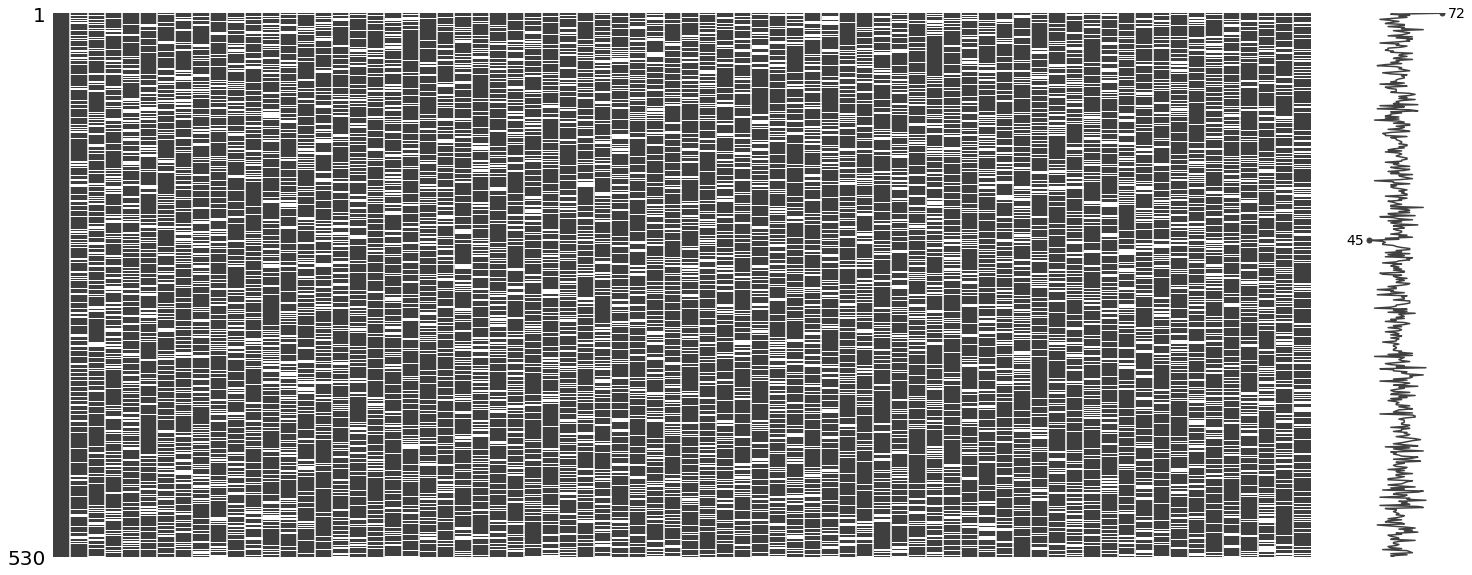

In [96]:
grafic_matrix_missing_values(pd.DataFrame(a[0]))

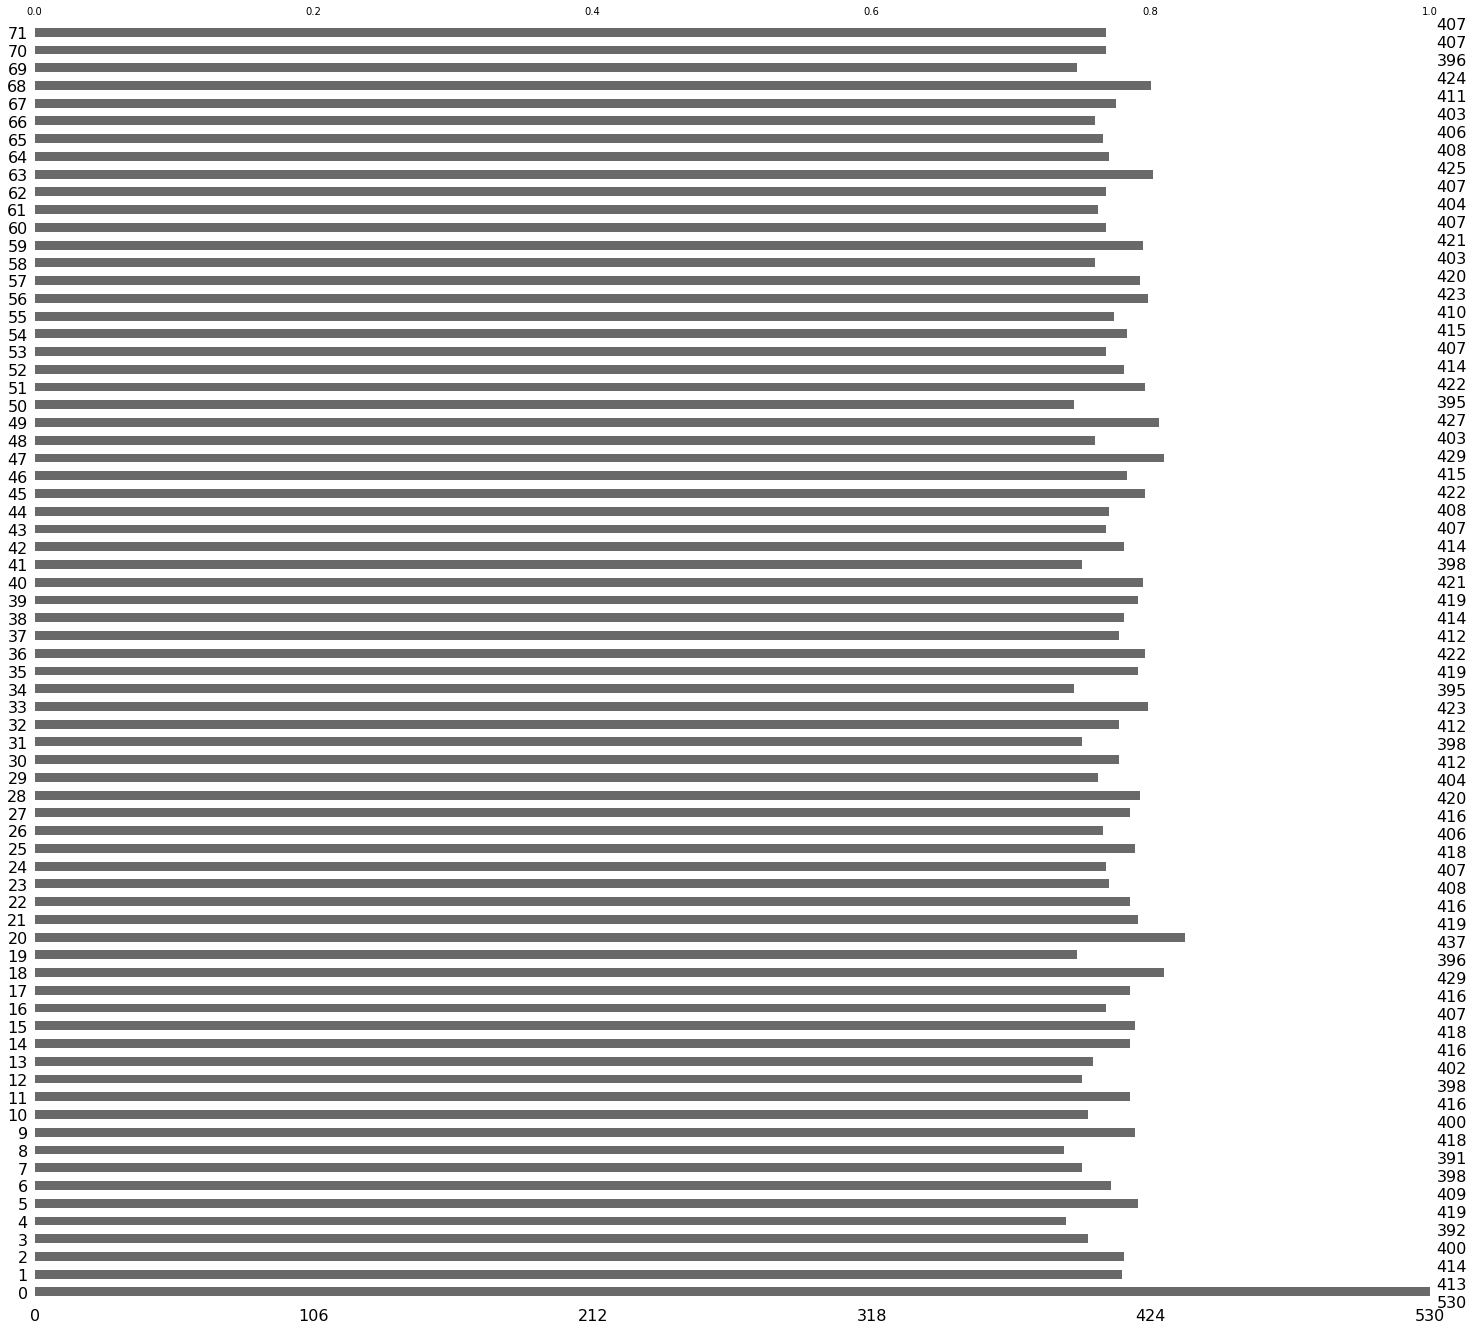

In [97]:
grafic_bar_missing_values(pd.DataFrame(a[0]))

In [98]:
def grafic_line_missing_values(df):
  import matplotlib.pyplot as plt 
  plt.figure(figsize=(20,3))
  plt.plot(df.isnull().sum(),marker='o')
  plt.title("Distribuição de Missing Values por features")
  plt.show()

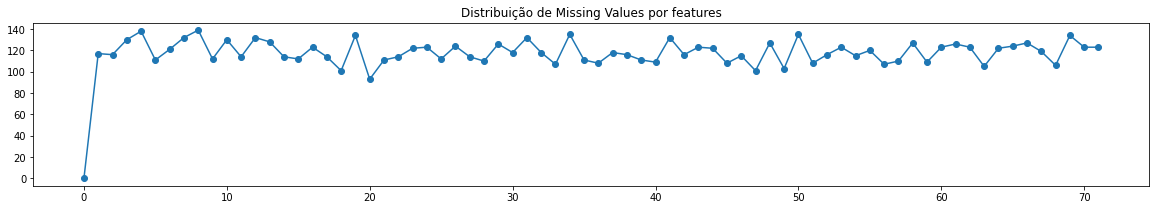

In [99]:
grafic_line_missing_values(pd.DataFrame(a[0]))

In [100]:
def describe(df):
  return df.describe()

In [101]:
describe(pd.DataFrame(data[0]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,0.069309,0.195399,0.085695,-72.998228,4.979178,0.602395,1.694625,0.634156,0.833964,0.508060,0.539452,0.471183,0.509122,0.477661,0.439237,0.445350,0.045755,0.157495,0.035775,4.574782,1.298807,0.941415,0.778116,0.650144,0.577431,0.552497,0.536358,0.518485,0.509343,0.492222,0.483663,0.469662,0.023932,0.063271,0.008137,3.641956,0.858002,0.623887,0.499193,0.385509,0.331884,0.313391,0.307803,0.304763,0.298987,0.287374,0.279034,0.271922,0.028901,0.066452,0.029527,4.147196,0.408222,0.239404,0.198588,0.151062,0.123111,0.115476,0.114181,0.113154,0.113794,0.109990,0.109876,0.107114,0.230008,74.456998,0.247854,155.215852,2.099494,0.412940,0.354901,0.959906
std,0.031293,0.117605,0.009260,7.580804,2.071792,1.017603,0.606581,0.448746,0.368312,0.303277,0.304705,0.282673,0.244190,0.219967,0.221101,0.201583,0.029710,0.108850,0.008561,1.560977,0.403095,0.270601,0.213410,0.154363,0.107429,0.094156,0.090469,0.083432,0.081292,0.072786,0.074544,0.077775,0.010763,0.031272,0.001489,1.807698,0.369745,0.258519,0.205131,0.152623,0.136194,0.138493,0.145385,0.158808,0.153431,0.162264,0.154762,0.163367,0.007393,0.023734,0.001404,0.509198,0.135642,0.086144,0.079094,0.060607,0.041531,0.038110,0.038317,0.044755,0.047745,0.049567,0.053819,0.059361,0.295863,14.610203,0.366541,29.807954,0.316040,0.339559,0.362262,0.651827
min,0.010201,0.038286,0.070932,-99.090802,0.051474,-2.277307,-0.604609,-1.143864,-0.237114,-0.444623,-0.895966,-0.451919,-0.294770,-0.258025,-0.394065,-0.129515,0.006918,0.017434,0.025297,1.665689,0.544490,0.426085,0.436355,0.343973,0.376085,0.329479,0.322254,0.327975,0.296855,0.297832,0.281625,0.273264,0.010574,0.018333,0.005696,1.103874,0.181559,0.107836,0.079273,0.055489,0.040192,0.048815,0.068473,0.055301,0.057608,0.048231,0.041973,0.033739,0.008712,0.015678,0.009090,1.908520,0.105014,0.048375,0.052660,0.034480,0.039299,0.024210,0.036153,0.032399,0.035843,0.038015,0.032472,0.031945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.044781,0.107742,0.079018,-77.078349,3.409922,-0.113441,1.307242,0.373195,0.605057,0.309033,0.361401,0.293853,0.356008,0.348202,0.306319,0.310737,0.023090,0.064634,0.030011,3.480119,1.004433,0.729514,0.595706,0.531264,0.494993,0.483637,0.471581,0.455864,0.452901,0.439741,0.430855,0.418312,0.017352,0.042342,0.007328,2.379514,0.611524,0.437861,0.361387,0.282277,0.242179,0.221745,0.211859,0.203123,0.195383,0.184146,0.182069,0.174657,0.024807,0.051708,0.029041,3.760212,0.310948,0.173113,0.137808,0.103660,0.092296,0.087538,0.087673,0.082425,0.081609,0.077882,0.075211,0.071286,0.047611,64.000000,0.007556,132.000000,2.000000,0.179411,0.099424,0.513974
50%,0.065251,0.169757,0.083637,-72.474302,4.642338,0.588380,1.731031,0.618838,0.819652,0.534665,0.520869,0.463832,0.500074,0.486893,0.435266,0.449567,0.037587,0.124873,0.033947,4.449266,1.266361,0.928566,0.735529,0.625212,0.557059,0.541025,0.523278,0.513161,0.501205,0.484658,0.478762,0.462062,0.021436,0.054313,0.007871,3.253290,0.779757,0.582761,0.471871,0.3

In [102]:
#Instalando o panda profile
#!pip install pandas-profiling
#from pandas_profiling import ProfileReport

#Imputação de dados


*   k-Nearest Neighbors (kNN) Imputation
*   mean
*   most_frequent
*   median







# Criação da popoulação inicial

imputando os indivíduos

In [103]:
#def knnImp(dataset_amputed):
#  from missingpy import KNNImputer
#  imputer_knn = KNNImputer(missing_values="NaN", n_neighbors=5, weights="uniform", 
#                 metric="masked_euclidean", row_max_missing=0.5, 
#                 col_max_missing=0.8, copy=True)
  
  #X_imputed_KNNI = imputer_knn.fit_transform(dataset_amputed)
  #return X_imputed_KNNI

In [104]:
from sklearn.impute import KNNImputer
def knnImp(dataset_amputed,neighbors):
  inputer_knn = KNNImputer(n_neighbors=neighbors)
  X_imputed_knn = inputer_knn.fit_transform(dataset_amputed)
  return X_imputed_knn

In [105]:
def rfImp(dataset_amputed):
  from missingpy import MissForest
  imputer_RFI = MissForest()
  X_imputed_RFI = imputer_RFI.fit_transform(dataset_amputed)
  return X_imputed_RFI

In [106]:
def meanImp(dataset_amputed):
  from sklearn.impute import SimpleImputer
  imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
  imputer_mean=imputer_mean.fit(dataset_amputed)
  X_imputed_mean = imputer_mean.transform(dataset_amputed)
  return X_imputed_mean

In [107]:
def mostFrequentImp(dataset_amputed):
  from sklearn.impute import SimpleImputer
  imputer_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  imputer_most_frequent=imputer_most_frequent.fit(dataset_amputed)
  X_imputed_most_frequent=imputer_most_frequent.transform(dataset_amputed)
  return X_imputed_most_frequent

In [108]:
def medianImp(dataset_amputed):
  from sklearn.impute import SimpleImputer
  imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
  imputer_median=imputer_median.fit(dataset_amputed)
  X_imputed_median=imputer_median.transform(dataset_amputed)
  return X_imputed_median

In [109]:
def imputation(method, df):
  #import gerais
  import sklearn.neighbors._base
  import sys
  sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
  

  if method == 'mean':
    base_imputada = meanImp(df)
  elif method == 'median':
    base_imputada = medianImp(df)
  elif method == 'most_frequent':
    base_imputada = mostFrequentImp(df)
  elif method == 'knn-3':
    base_imputada = knnImp(df,3)
  elif method == 'knn-5':
    base_imputada = knnImp(df,5)
  elif method == 'knn-10':
    base_imputada = knnImp(df,10)
  return base_imputada


Padronização dos dados

In [110]:
imputation_meth  = ['knn-3','knn-5','knn-10', 'mean', 'most_frequent', 'median']
inds = []
df_amp = pd.DataFrame(a[0])
for i  in imputation_meth:
  inds.append(imputation(i,df_amp))

In [111]:
inds

[array([[0.034741  , 0.089665  , 0.091225  , ..., 0.245457  , 0.105065  ,
         0.405399  ],
        [0.081374  , 0.272747  , 0.085733  , ..., 0.343547  , 0.276366  ,
         0.710924  ],
        [0.110545  , 0.26494767, 0.09402033, ..., 0.188693  , 0.045941  ,
         0.457372  ],
        ...,
        [0.035169  , 0.065403  , 0.075227  , ..., 0.223444  , 0.13553167,
         0.476993  ],
        [0.054276  , 0.238158  , 0.095935  , ..., 0.547126  , 0.183494  ,
         0.40826133],
        [0.073194  , 0.140733  , 0.07789867, ..., 0.087328  , 0.33276467,
         0.451701  ]]),
 array([[0.034741 , 0.089665 , 0.091225 , ..., 0.245457 , 0.105065 ,
         0.405399 ],
        [0.081374 , 0.272747 , 0.085733 , ..., 0.343547 , 0.276366 ,
         0.710924 ],
        [0.110545 , 0.2877214, 0.0898876, ..., 0.188693 , 0.045941 ,
         0.457372 ],
        ...,
        [0.035169 , 0.065403 , 0.075227 , ..., 0.198102 , 0.1900358,
         0.476993 ],
        [0.054276 , 0.238158 , 0.095

In [112]:
len(inds)

6

Normmalização da população inicial

In [113]:
populationInitial = inds
#for i in range(len(individuos)):
#  populationInitial.append(padronizacao(individuos[i]))

In [114]:
populationInitial

[array([[0.034741  , 0.089665  , 0.091225  , ..., 0.245457  , 0.105065  ,
         0.405399  ],
        [0.081374  , 0.272747  , 0.085733  , ..., 0.343547  , 0.276366  ,
         0.710924  ],
        [0.110545  , 0.26494767, 0.09402033, ..., 0.188693  , 0.045941  ,
         0.457372  ],
        ...,
        [0.035169  , 0.065403  , 0.075227  , ..., 0.223444  , 0.13553167,
         0.476993  ],
        [0.054276  , 0.238158  , 0.095935  , ..., 0.547126  , 0.183494  ,
         0.40826133],
        [0.073194  , 0.140733  , 0.07789867, ..., 0.087328  , 0.33276467,
         0.451701  ]]),
 array([[0.034741 , 0.089665 , 0.091225 , ..., 0.245457 , 0.105065 ,
         0.405399 ],
        [0.081374 , 0.272747 , 0.085733 , ..., 0.343547 , 0.276366 ,
         0.710924 ],
        [0.110545 , 0.2877214, 0.0898876, ..., 0.188693 , 0.045941 ,
         0.457372 ],
        ...,
        [0.035169 , 0.065403 , 0.075227 , ..., 0.198102 , 0.1900358,
         0.476993 ],
        [0.054276 , 0.238158 , 0.095

In [115]:
inds[0].shape, populationInitial[0].shape

((530, 72), (530, 72))

In [116]:
X_train.shape, y_train.shape

((530, 72), (530, 6))

# Função Fitness

Os indivíduos da população são avaliados no aprendizado multirrótulo.
Neste experimento, serão testados algorítmos que transformam o problema e algorítmos que adaptam o problema.

In [117]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

def evaluation_binaryRelevance(core_algorithm, individual, metric = 'F1'):
  if core_algorithm == 'svm':
    classifier_br = BinaryRelevance(classifier=SVC(C=50),require_dense=[False, True])#
    classifier_br.fit(individual, y_train)
    prediction_br = classifier_br.predict(X_test)

    F1 = f1_score(y_test, prediction_br, average='micro')
    ACC = accuracy_score(y_test, prediction_br)
    HL = hamming_loss(y_test, prediction_br)

  elif core_algorithm == 'randomForest':
    classifier = BinaryRelevance(classifier = RandomForestClassifier(),require_dense = [False, True])
    classifier.fit(individual, y_train)
    prediction_br_RFC=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_RFC, average='micro')
    ACC = accuracy_score(y_test, prediction_br_RFC)
    HL = hamming_loss(y_test, prediction_br_RFC)
  elif core_algorithm == '3nn':
    classifier = BinaryRelevance(classifier = KNeighborsClassifier(n_neighbors=3))
    classifier.fit(individual, y_train)
    prediction_br_3knn=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_3knn, average='micro')
    ACC = accuracy_score(y_test, prediction_br_3knn)
    HL = hamming_loss(y_test, prediction_br_3knn)
  elif core_algorithm == '5nn':
    classifier = BinaryRelevance(classifier = KNeighborsClassifier())
    classifier.fit(individual, y_train)
    prediction_br_5knn=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_5knn, average='micro')
    ACC = accuracy_score(y_test, prediction_br_5knn)
    HL = hamming_loss(y_test, prediction_br_5knn)
  elif core_algorithm == '10nn':
    classifier = BinaryRelevance(classifier = KNeighborsClassifier(n_neighbors=10))
    classifier.fit(individual, y_train)
    prediction_br_10knn=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_10knn, average='micro')
    ACC = accuracy_score(y_test, prediction_br_10knn)
    HL = hamming_loss(y_test, prediction_br_10knn) 
  elif core_algorithm == 'lr':
    from sklearn.linear_model import LogisticRegression
    classifier = BinaryRelevance(classifier = LogisticRegression())
    classifier.fit(individual, y_train)
    prediction_br_lr=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_lr, average='micro')
    ACC = accuracy_score(y_test, prediction_br_lr)
    HL = hamming_loss(y_test, prediction_br_lr)
  if metric == 'ACC':
    return  ACC
  elif metric == 'F1':
    return F1
  elif metric == 'HL':
    return HL


In [118]:
#svm = evaluation_binaryRelevance('svm', populationInitial[0])
#knn3 = evaluation_binaryRelevance('3nn', populationInitial[0])
#knn5 = evaluation_binaryRelevance('5nn', populationInitial[0])
#knn10 = evaluation_binaryRelevance('10nn', populationInitial[0])
#rf = evaluation_binaryRelevance('randomForest', populationInitial[0])


In [119]:
#print(svm, knn3, knn5,knn10, rf)

Não executando Random Forest devido também ser um algorítmo que funciona como bagging

In [120]:
def fitness(population,metric):
  metrica = []
  populacao = []
  aval_lista_descrecente = []
  aval_lista_crescente = []
  indivuduos = {}
  accuracy = {}
  print('tam_pop_atual: ',len(population))
  print('Avaliações com Binary Relevance\n')
  indexx = 0
  for i in range(len(population)):
    print('Individual - ',i)
    metrica.append(evaluation_binaryRelevance('svm', population[indexx], metric=metric))
    metrica.append(evaluation_binaryRelevance('randomForest', population[indexx],metric=metric))
    metrica.append(evaluation_binaryRelevance('3nn', population[indexx],metric=metric))
    metrica.append(evaluation_binaryRelevance('5nn', population[indexx],metric=metric))
    metrica.append(evaluation_binaryRelevance('10nn', population[indexx],metric=metric))

    aval_lista_descrecente = sorted(metrica, reverse=True)
    aval_lista_crescente = sorted(metrica)

    melhor = aval_lista_descrecente[0]
    pior = aval_lista_crescente[0]

    populacao.append([melhor, population[indexx]])

    indivuduos[i] = melhor
    indexx = indexx+1
    print('Pior:', pior, ' melhor (escolhido):', melhor)
    print('----------------------------------------------------')
    melhor = ''
    pior = ''
    aval_lista_descrecente = []
    aval_lista_crescente = []
    metrica = []
  return populacao



In [121]:
populacao_inicial_avaliada = fitness(populationInitial,'ACC')

tam_pop_atual:  6
Avaliações com Binary Relevance

Individual -  0
Pior: 0.12698412698412698  melhor (escolhido): 0.3492063492063492
----------------------------------------------------
Individual -  1
Pior: 0.12698412698412698  melhor (escolhido): 0.3492063492063492
----------------------------------------------------
Individual -  2
Pior: 0.12698412698412698  melhor (escolhido): 0.3333333333333333
----------------------------------------------------
Individual -  3
Pior: 0.14285714285714285  melhor (escolhido): 0.3492063492063492
----------------------------------------------------
Individual -  4
Pior: 0.07936507936507936  melhor (escolhido): 0.3333333333333333
----------------------------------------------------
Individual -  5
Pior: 0.14285714285714285  melhor (escolhido): 0.3333333333333333
----------------------------------------------------


In [122]:
populacao_inicial_avaliada

[[0.3492063492063492,
  array([[0.034741  , 0.089665  , 0.091225  , ..., 0.245457  , 0.105065  ,
          0.405399  ],
         [0.081374  , 0.272747  , 0.085733  , ..., 0.343547  , 0.276366  ,
          0.710924  ],
         [0.110545  , 0.26494767, 0.09402033, ..., 0.188693  , 0.045941  ,
          0.457372  ],
         ...,
         [0.035169  , 0.065403  , 0.075227  , ..., 0.223444  , 0.13553167,
          0.476993  ],
         [0.054276  , 0.238158  , 0.095935  , ..., 0.547126  , 0.183494  ,
          0.40826133],
         [0.073194  , 0.140733  , 0.07789867, ..., 0.087328  , 0.33276467,
          0.451701  ]])],
 [0.3492063492063492,
  array([[0.034741 , 0.089665 , 0.091225 , ..., 0.245457 , 0.105065 ,
          0.405399 ],
         [0.081374 , 0.272747 , 0.085733 , ..., 0.343547 , 0.276366 ,
          0.710924 ],
         [0.110545 , 0.2877214, 0.0898876, ..., 0.188693 , 0.045941 ,
          0.457372 ],
         ...,
         [0.035169 , 0.065403 , 0.075227 , ..., 0.198102 , 0.

# Elitismo
O melhor individuo é passado para a proxima geracao - Elitismo

In [123]:
def elitismo(populacao_avaliada):
  #ordena a população passada de forma descrescente
  populacao_ordenada  = sorted(populacao_avaliada, key=lambda x: x[0], reverse=True)
  elitista = populacao_ordenada[0]
  return elitista

In [124]:
elitista = elitismo(populacao_inicial_avaliada)

In [125]:
elitista

[0.3492063492063492,
 array([[0.034741  , 0.089665  , 0.091225  , ..., 0.245457  , 0.105065  ,
         0.405399  ],
        [0.081374  , 0.272747  , 0.085733  , ..., 0.343547  , 0.276366  ,
         0.710924  ],
        [0.110545  , 0.26494767, 0.09402033, ..., 0.188693  , 0.045941  ,
         0.457372  ],
        ...,
        [0.035169  , 0.065403  , 0.075227  , ..., 0.223444  , 0.13553167,
         0.476993  ],
        [0.054276  , 0.238158  , 0.095935  , ..., 0.547126  , 0.183494  ,
         0.40826133],
        [0.073194  , 0.140733  , 0.07789867, ..., 0.087328  , 0.33276467,
         0.451701  ]])]

# Seleção

O processo de seleçãp é dado por torneio, sorteando dois pais

In [126]:
import random
def selecao(pop_atual):
  sorteio1 = random.choice(range(len(pop_atual)))
  #print(sorteio1)
  sorteio2 = random.choice(range(len(pop_atual)))
  #print(sorteio2)
  pai1 = pop_atual[sorteio1]
  pai2 = pop_atual[sorteio2]
  #print(pai1[0])
  #print(pai2[0])

  if(pai1[0] >= pai2[0]):
    return pai1
  else:
    return pai2

#Cruzamento

Cruzamento de n-points

In [127]:
#indeces com a posição do valores ausentes
index_vas = a[1]

In [128]:
index_vas

[[8, 9],
 [105, 13],
 [379, 31],
 [151, 16],
 [28, 47],
 [52, 19],
 [266, 56],
 [22, 69],
 [245, 41],
 [403, 4],
 [222, 10],
 [280, 24],
 [527, 57],
 [174, 61],
 [303, 21],
 [66, 7],
 [126, 40],
 [6, 60],
 [90, 15],
 [54, 58],
 [409, 41],
 [394, 16],
 [148, 22],
 [94, 19],
 [321, 64],
 [28, 27],
 [66, 28],
 [356, 57],
 [170, 3],
 [489, 10],
 [303, 50],
 [395, 66],
 [208, 65],
 [369, 68],
 [231, 15],
 [330, 7],
 [25, 2],
 [413, 23],
 [69, 66],
 [87, 32],
 [124, 40],
 [257, 25],
 [444, 64],
 [294, 25],
 [502, 54],
 [268, 43],
 [323, 25],
 [454, 7],
 [163, 41],
 [304, 16],
 [241, 10],
 [184, 47],
 [15, 41],
 [498, 67],
 [350, 65],
 [270, 66],
 [6, 10],
 [129, 8],
 [390, 23],
 [124, 4],
 [242, 31],
 [340, 23],
 [370, 17],
 [404, 20],
 [295, 1],
 [377, 67],
 [462, 28],
 [419, 35],
 [100, 46],
 [212, 1],
 [112, 40],
 [491, 16],
 [488, 52],
 [64, 7],
 [291, 45],
 [358, 22],
 [150, 46],
 [129, 49],
 [185, 13],
 [40, 44],
 [308, 58],
 [129, 44],
 [384, 62],
 [408, 1],
 [207, 49],
 [87, 42],
 [4

In [129]:
def crossover(list_index_vas,n_points, new_population, tam_population):
  nova_populacao_com_crossover = []
  #elitista = new_population[0]
  #nova_populacao_com_crossover.append(elitista[1])

  while(len(nova_populacao_com_crossover)<tam_population):
    sorteio1 = random.choice(range(len(new_population)))
    #escolha dos pais que terão materiais trocados
    #print(sorteio1)
    sorteio2 = random.choice(range(len(new_population)))
    #print(sorteio2)
    while(sorteio1 == sorteio2):
      sorteio2 = random.choice(range(len(new_population)))
    pai1 = new_population[sorteio1]
    pai2 = new_population[sorteio2]

    df_pai1 = pd.DataFrame(pai1[1])
    df_pai2 = pd.DataFrame(pai2[1])
  
    genes_all_pai1 = []

    genes_all_pai2 = []

    #recuperando os genes de cada pai
    for i in list_index_vas:
      genes_all_pai1.append(df_pai1.iloc[i[0],i[1]])
      genes_all_pai2.append(df_pai2.iloc[i[0],i[1]])
    #dividindo os genes de acordo com o n_points
    divide_genes_pai_1 = np.array_split(genes_all_pai1,n_points)
    divide_genes_pai_2 = np.array_split(genes_all_pai2,n_points)

    genes_0_pai1 = divide_genes_pai_1[0]
    genes_1_pai1 = divide_genes_pai_1[1]

    genes_0_pai2 = divide_genes_pai_2[0]
    genes_1_pai2 = divide_genes_pai_2[1]

    t1 = len(genes_1_pai1)
    t2 = len(genes_1_pai2)

    divide_list_index = np.array_split(list_index_vas,n_points)
    primeira_parte = divide_list_index[0]
    segunda_parte = divide_list_index[1]

    genes_parte_2_pai1 = genes_1_pai1.tolist()
    genes_parte_2_pai2 = genes_1_pai2.tolist()

    #Trocando genes dos pais
    index = 0
    for i in segunda_parte:
      df_pai1.iloc[i[0].astype(int), i[1].astype(int)] = genes_1_pai2[index]
      df_pai2.iloc[i[0].astype(int), i[1].astype(int)] = genes_1_pai1[index]
      index = index +1
    filho1 = df_pai1
    filho2 = df_pai2
    nova_populacao_com_crossover.append(filho1.to_numpy())
    nova_populacao_com_crossover.append(filho2.to_numpy())
  #filho1, filho2,pai1[1],pai1[2]
  print('Tamanho da nova população gerada por meio do cruzamento:',len(nova_populacao_com_crossover))
  return nova_populacao_com_crossover

In [130]:
nova_populacao_recombinada = crossover(index_vas,2,populacao_inicial_avaliada,10)
nova_populacao_recombinada

Tamanho da nova população gerada por meio do cruzamento: 10


[array([[0.034741 , 0.089665 , 0.091225 , ..., 0.245457 , 0.105065 ,
         0.405399 ],
        [0.081374 , 0.272747 , 0.085733 , ..., 0.343547 , 0.276366 ,
         0.710924 ],
        [0.110545 , 0.167156 , 0.083771 , ..., 0.188693 , 0.045941 ,
         0.457372 ],
        ...,
        [0.035169 , 0.065403 , 0.075227 , ..., 0.295552 , 0.2149692,
         0.476993 ],
        [0.054276 , 0.238158 , 0.095935 , ..., 0.547126 , 0.183494 ,
         0.788581 ],
        [0.073194 , 0.140733 , 0.083771 , ..., 0.087328 , 0.249179 ,
         0.451701 ]]),
 array([[0.034741 , 0.089665 , 0.091225 , ..., 0.245457 , 0.105065 ,
         0.405399 ],
        [0.081374 , 0.272747 , 0.085733 , ..., 0.343547 , 0.276366 ,
         0.710924 ],
        [0.110545 , 0.2535906, 0.0874852, ..., 0.188693 , 0.045941 ,
         0.457372 ],
        ...,
        [0.035169 , 0.065403 , 0.075227 , ..., 0.4079992, 0.1900358,
         0.476993 ],
        [0.054276 , 0.238158 , 0.095935 , ..., 0.547126 , 0.183494 ,
   

# Mutação

In [131]:
def mutacao(dX_amputed,ind, list_missing_values):
  import random
  #de numpy para pandas format
  ind = pd.DataFrame(ind)
  #serão selecionados x% de individuos da população e são trocadas todas as solucões
  #candidatas já imputadas por uma nova solução da pool de soluções
  #amount_inds_mutation = int(rate_mutation *  len(inds_pop))
  for i in list_missing_values:
    #criando um pool solutions de acordo com a o valor de x da lista de index
    lista_do_indice_atual = dX_amputed.iloc[:,i[1]]
    #removendo o indices NaN para criar a pool solutions só com soluções candatas não-nulas
    pool_solutions = [x for x in lista_do_indice_atual if pd.isnull(x) == False]
    #substituindo o gene do indivíduo por um dos genes da pool solutions
    #print('index: ', i[0],',', i[1])
    #print('antes: ',ind.iloc[i[0],i[1]])
    ind.iloc[i[0],i[1]] = random.choice(pool_solutions)
    #print('depois: ',ind.iloc[i[0],i[1]])
  return ind.to_numpy()

In [132]:
#ind = mutacao(df_amp)

In [133]:
def mutations(dX_amputed,population, rate_mutation,list_missing_values):
  populacao_cruzada = population.copy()
  amount_inds_mutation = int(rate_mutation *  len(populacao_cruzada))
  i = 0
  while(i < amount_inds_mutation):
    ind_escolhido_pra_mutacao = populacao_cruzada.pop(i)
    ind_mutado = mutacao(dX_amputed, ind_escolhido_pra_mutacao,list_missing_values)
    populacao_cruzada.append(ind_mutado)
    i=i+1
  return populacao_cruzada

# Algoritmo Genético



1.   elitisimo: 1
2.   gerações: 6
3.   geracoes_sizes{6,12,18,24,30}
4.   cruzamento: n-points
5.   cruzamento: torneio



In [134]:
def nova_populacao(df_amp,individuo_elitista, pop_atual, tam_population,n_points, list_index_vas=index_vas):
  formacao_nova_populacao = []
  formacao_nova_populacao.append(individuo_elitista)
  while(len(formacao_nova_populacao)<= tam_population):
    formacao_nova_populacao.append(selecao(pop_atual))
  #pega a população selecionada para fazer a recombinação
  nova_populacao_combinada = crossover(list_index_vas,n_points, formacao_nova_populacao, tam_population)
  #20% dos individuos sofrem mutações
  #a nova populacao combinada é passada como parametro
  populacao_cruzada_e_mutada = mutations(df_amp,nova_populacao_combinada, 0.20,list_index_vas)

  return populacao_cruzada_e_mutada

# Benckmarking Experimental

In [135]:
dados = ['a','b','c','d','e']
dados_ = ['1','1','1','1','1']
def _geracoes_results(dados,name_file,dataset, missing_values_rate):
  with open(name_file, 'a') as arquivo:
    arquivo.write('\n'+str(dataset)+'_mv_'+str(missing_values_rate)+' ')
    for i in dados:
      arquivo.write(' '+str(i)+' ')



In [136]:
#_geracoes_results(dados, '/content/drive/MyDrive/Colab Notebooks/resultados_evoimp/a.txt','dataset',0.05)

In [137]:
def results_exp(name_file,algorithm,dataset_name, vas, metric,dado):
  with open(name_file, 'a') as arquivo:
    arquivo.write('\n'+str(algorithm)+'_'+dataset_name+'_'+str(vas)+'_'+metric+' '+dado)

In [138]:
#def otimizacao(geracoes,populacao_inicial,elitista,metric,dataset_amputado, missing_values_rate,dataset_name):
# melhores_por_geracao = []
#  for p in [8,10,12,14,16,18]:
#   melhor = elitista
#    melhores_por_geracao.append(melhor)
#   print('tamanho da população atual',len(populacao_inicial))
    #Cria nova populacao
    #n_pop = nova_populacao(dataset_amputado, melhor, populacao_inicial, p,2)
    #avalia populacao formada
    #populacao_atual_avaliada = fitness(n_pop,metric=metric)
    #print(n_pop[0])
    #passando o melhor elitista
    #print(melhor)
    #populacao_inicial = []
    #melhor_atual  = elitismo(populacao_atual_avaliada)
    #if (melhor_atual[0]>melhor[0]):
      #melhores_por_geracao.append(melhor_atual)
      #populacao_inicial.append(melhor_atual)
      #melhor = melhor_atual
     # print('Novo melhor:',melhor_atual[0])
    #else:
      #populacao_atual_avaliada.pop(len(populacao_atual_avaliada)-1)
      #melhores_por_geracao.append(melhor)
      #populacao_inicial.append(melhor)
     # print('melhor anterior foi escolhido: ',melhor[0])
    #populacao_inicial.extend(populacao_atual_avaliada)
    #print(len(populacao_inicial))
    #re = melhores_por_geracao
    #res = melhores_por_geracao[len(melhores_por_geracao)-1]
    #print('Melhor encontrado: ',melhores_por_geracao[len(melhores_por_geracao)-1])
    #r = []
    #for x in re:
     # r.append(str(x[0]))
    #print('tamanho da poppop',len(r) )
    #file_name = dataset_name+'_'+str(missing_values_rate)+'.txt'
    #_geracoes_results(r,'geracoes_ag.txt',dataset_name,str(missing_values_rate))
    #return res[0]#,res[1]

In [139]:
geracoes = [8,10,12,14,16,18] # 7-geracoes(com a populacao inicial)
rates_missing_values = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
imputation_methods  = ['knn-3','knn-5','knn-10', 'mean', 'most_frequent', 'median']
#lendo datasets via scikit-multilearning
dataset_name = 'emotions'
dataset = load_dataset(dataset_name)
X = dataset[0]
y = dataset[1]
#Aplicando validação cruzada do tipo K-folds - (10-folds)
data_validations = cross_validation(X,y,10)
X_train = data_validations[0]
X_test = data_validations[1]
y_train = data_validations[2]
y_test = data_validations[3]
#verificando missing values 
#missing_values =missing_values(pd.DataFrame(X_train))
#Amputação de dados
accuracy = []
for i in rates_missing_values:
  dados_amputacao = amputation(i, X_train)
  lista_indices_amputados = dados_amputacao[1]
  dataset_amputado = dados_amputacao[0]
  #imputação para formação da população incial
  individuos = []
  for j  in imputation_methods:
    individuos.append(imputation(j,dataset_amputado))
  #========================================================================
  #Fazendo experimentos com a média dos avaliações para SVM e Random Forest
  #para cada imputação simples realizada na população inicial é feito um experimento
  #com RF e SVM o valor utilizado é a média do desempenho da classificação
  #dessa forma é possivel considerar todas as formas de imputação para os 
  #classificados bases utilizados 
  #========================================================================
  bases_completas = individuos
  avalicoes_inds_rf = []
  avalicoes_inds_svm = []
  for l in range(len(bases_completas)):
    avalicoes_inds_rf.append(evaluation_binaryRelevance('randomForest', bases_completas[l], metric='F1'))
    avalicoes_inds_svm.append(evaluation_binaryRelevance('svm', bases_completas[l],metric='F1'))
  #print(avalicoes_inds_rf) 
  #print(avalicoes_inds_svm)

  print('media Random Forest: ',np.mean(np.array(avalicoes_inds_rf)) ) 
  print('media SVM: ',np.mean(np.array(avalicoes_inds_svm) )) 

  results_exp('/content/drive/MyDrive/Colab Notebooks/resultados_evoimp/resultados_f1.txt', 'SVM',dataset_name, i, 'f1',str(np.mean(np.array(avalicoes_inds_svm))))
  results_exp('/content/drive/MyDrive/Colab Notebooks/resultados_evoimp/resultados_f1.txt', 'RF',dataset_name, i, 'f1',str(np.mean(np.array(avalicoes_inds_rf))))

  #========================================================================
  #Fazendo experimentos com o Algoritmo Genético
  #========================================================================
  populationInitial = individuos
  #avaliando a pupolução inicial e ordenada (DESC) e avaliando com a acurácia
  populacao_avaliada = fitness(populationInitial,'F1')
  #elitismo
  elitista = elitismo(populacao_avaliada)
  #iniciando o processo de otimização (criterio de parada é determinado pelas gerações)
  populacao_inicial = populacao_avaliada
  melhor = elitista
  melhores_por_geracao = []
  melhores_por_geracao.append(melhor[0])
  for p in [8,10,12,14,16,18]:
    print('p: ',p)
    n_pop = nova_populacao(dataset_amputado, melhor, populacao_inicial, p,2)
    populacao_atual_avaliada = fitness(n_pop,metric='F1')
    populacao_inicial = []
    melhor_atual  = elitismo(populacao_atual_avaliada)
    if (melhor_atual[0]>melhor[0]):
      melhores_por_geracao.append(melhor_atual[0])
      #populacao_inicial.append(melhor_atual)
      melhor = melhor_atual
      print('Novo melhor:',melhor_atual[0])
    else:
      #melhor = melhor
      populacao_atual_avaliada.pop(len(populacao_atual_avaliada)-1)
      melhores_por_geracao.append(melhor[0])
      populacao_inicial.append(melhor)
      print('melhor anterior foi escolhido: ',melhor[0])
    populacao_inicial.extend(populacao_atual_avaliada)
  _geracoes_results(melhores_por_geracao,'/content/drive/MyDrive/Colab Notebooks/resultados_evoimp/geracoes_ag_f1.txt',dataset_name,str(i))
  print('melhores por geracao',len(melhores_por_geracao))
  results_exp('/content/drive/MyDrive/Colab Notebooks/resultados_evoimp/resultados_f1.txt', 'AG',dataset_name, i, 'f1',str(melhores_por_geracao[len(melhores_por_geracao)-1]))
  melhores_por_geracao = []
    



  #z = otimizacao(geracoes=geracoes, populacao_inicial=populacao_inicial, elitista=elitista,metric='ACC', dataset_amputado=dataset_amputado,missing_values_rate=i,dataset_name=dataset_name)
  #
  #z = ''

emotions:undivided - exists, not redownloading
Total dados: 38160
 Total VAs: 1908

media Random Forest:  0.6833956579329173
media SVM:  0.506891249839487
tam_pop_atual:  6
Avaliações com Binary Relevance

Individual -  0
Pior: 0.4180790960451977  melhor (escolhido): 0.7014218009478673
----------------------------------------------------
Individual -  1
Pior: 0.4245810055865922  melhor (escolhido): 0.6851851851851852
----------------------------------------------------
Individual -  2
Pior: 0.4157303370786517  melhor (escolhido): 0.6877828054298641
----------------------------------------------------
Individual -  3
Pior: 0.4114285714285715  melhor (escolhido): 0.7069767441860465
----------------------------------------------------
Individual -  4
Pior: 0.40963855421686746  melhor (escolhido): 0.7014218009478673
----------------------------------------------------
Individual -  5
Pior: 0.40697674418604646  melhor (escolhido): 0.7037037037037037
-----------------------------------------

# Graficos Resultantes 

## Gerações

In [ ]:
#df_emotions_geracoes_acc = pd.DataFrame()
df_emotions_geracoes_f1 = pd.DataFrame()
with open('/content/drive/MyDrive/Colab Notebooks/resultados_evoimp/geracoes_ag_f1.txt', 'r') as file:
  for vals in file:
    if vals != '':
      instancias = vals.split()
      if len(instancias) > 0:
        col = instancias.pop(0)
        df_emotions_geracoes_f1[str(col)] = instancias
        print(len(instancias))

    


In [153]:
df_emotions_geracoes_f1

,emotions_mv_0.05,emotions_mv_0.1,emotions_mv_0.15,emotions_mv_0.2,emotions_mv_0.25,emotions_mv_0.3
0,0.7069767441860465,0.7102803738317757,0.6886792452830189,0.704225352112676,0.6944444444444443,0.6784140969162995
1,0.7169811320754716,0.7115384615384616,0.7238095238095238,0.7069767441860465,0.7,0.6846846846846847
2,0.7169811320754716,0.7129629629629629,0.7272727272727272,0.7090909090909091,0.721153846153846,0.6995515695067264
3,0.7230046948356808,0.7129629629629629,0.7272727272727272,0.7109004739336493,0.721153846153846,0.7096774193548386
4,0.7230046948356808,0.7129629629629629,0.7272727272727272,0.7109004739336493,0.721153846153846,0.7096774193548386
5,0.7230046948356808,0.7129629629629629,0.7272727272727272,0.7109004739336493,0.721153846153846,0.7096774193548386
6,0.7230046948356808,0.7129629629629629,0.7272727272727272,0.7109004739336493,0.721153846153846,0.7096774193548386


In [156]:
df_emotions_geracoes_f1['emotions_mv_0.05'] = pd.to_numeric(df_emotions_geracoes_f1['emotions_mv_0.05'])
df_emotions_geracoes_f1['emotions_mv_0.1'] = pd.to_numeric(df_emotions_geracoes_f1['emotions_mv_0.1'])
df_emotions_geracoes_f1['emotions_mv_0.15'] = pd.to_numeric(df_emotions_geracoes_f1['emotions_mv_0.15'])
df_emotions_geracoes_f1['emotions_mv_0.2'] = pd.to_numeric(df_emotions_geracoes_f1['emotions_mv_0.2'])
df_emotions_geracoes_f1['emotions_mv_0.25'] = pd.to_numeric(df_emotions_geracoes_f1['emotions_mv_0.25'])
df_emotions_geracoes_f1['emotions_mv_0.3'] = pd.to_numeric(df_emotions_geracoes_f1['emotions_mv_0.3'])

In [157]:
df_emotions_geracoes_f1

,emotions_mv_0.05,emotions_mv_0.1,emotions_mv_0.15,emotions_mv_0.2,emotions_mv_0.25,emotions_mv_0.3
0,0.706977,0.710280,0.688679,0.704225,0.694444,0.678414
1,0.716981,0.711538,0.723810,0.706977,0.700000,0.684685
2,0.716981,0.712963,0.727273,0.709091,0.721154,0.699552
3,0.723005,0.712963,0.727273,0.710900,0.721154,0.709677
4,0.723005,0.712963,0.727273,0.710900,0.721154,0.709677
5,0.723005,0.712963,0.727273,0.710900,0.721154,0.709677
6,0.723005,0.712963,0.727273,0.710900,0.721154,0.709677


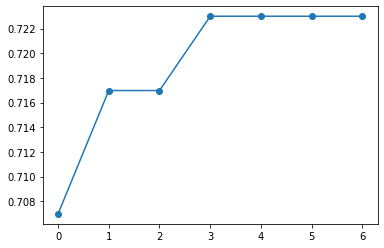

In [158]:
df_emotions_geracoes_f1['emotions_mv_0.05'].plot(style='.-',marker='o')

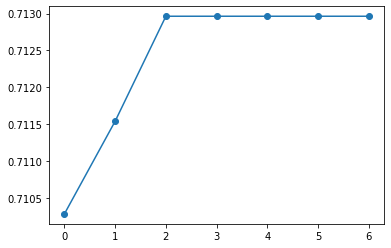

In [159]:
df_emotions_geracoes_f1['emotions_mv_0.1'].plot(style='.-',marker='o')

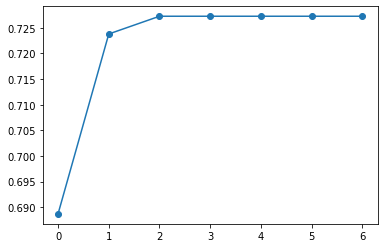

In [160]:
df_emotions_geracoes_f1['emotions_mv_0.15'].plot(style='.-',marker='o')

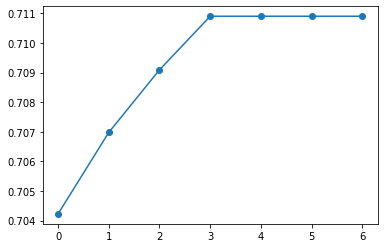

In [161]:
df_emotions_geracoes_f1['emotions_mv_0.2'].plot(style='.-',marker='o')

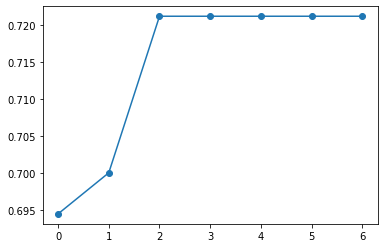

In [162]:
df_emotions_geracoes_f1['emotions_mv_0.25'].plot(style='.-',marker='o')

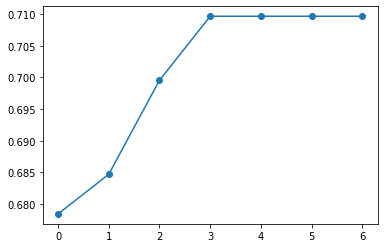

In [163]:
df_emotions_geracoes_f1['emotions_mv_0.3'].plot(style='.-',marker='o')

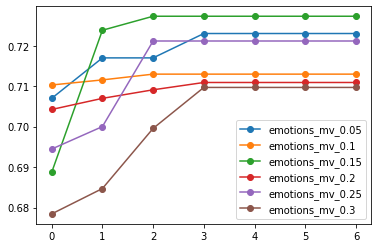

In [164]:
df_emotions_geracoes_f1.plot(style='.-',marker='o')

## Dados comparativos

In [165]:
with open('/content/drive/MyDrive/Colab Notebooks/resultados_evoimp/resultados_f1.txt','r') as resultados_finais_acc:
  print('Resultados comparativos para F1-Score')
  print( 'O algoritmo Multilabel utilizado em ambos os experimentos foi o BR')
  for r in resultados_finais_acc:
    print(r)

Resultados comparativos para F1-Score
O algoritmo Multilabel utilizado em ambos os experimentos foi o BR


SVM_emotions_0.05_f1 0.506891249839487

RF_emotions_0.05_f1 0.6833956579329173

AG_emotions_0.05_f1 0.7230046948356808

SVM_emotions_0.1_f1 0.48506783573484813

RF_emotions_0.1_f1 0.6897289730951789

AG_emotions_0.1_f1 0.7129629629629629

SVM_emotions_0.15_f1 0.4597929514308387

RF_emotions_0.15_f1 0.6883501701383463

AG_emotions_0.15_f1 0.7272727272727272

SVM_emotions_0.2_f1 0.45269412699358985

RF_emotions_0.2_f1 0.679087714322808

AG_emotions_0.2_f1 0.7109004739336493

SVM_emotions_0.25_f1 0.4086504569454317

RF_emotions_0.25_f1 0.6582095056232767

AG_emotions_0.25_f1 0.721153846153846

SVM_emotions_0.3_f1 0.29003099139910365

RF_emotions_0.3_f1 0.6370615555845472

AG_emotions_0.3_f1 0.7096774193548386
